In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Resultsd.csv')

In [3]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

In [4]:
df['revenue'] = df['price']

In [8]:
revenue_by_pizza_id = df.groupby(['pizza_id', pd.Grouper(key='datetime', freq='M')]).sum().reset_index()

In [9]:
revenue_by_pizza_id = revenue_by_pizza_id.sort_values(by='revenue', ascending=False)

In [7]:
top_pizza_ids = df['pizza_id'].value_counts().nlargest(10).index.tolist()
revenue_by_top_pizza_ids = revenue_by_pizza_id[revenue_by_pizza_id['pizza_id'].isin(top_pizza_ids)]

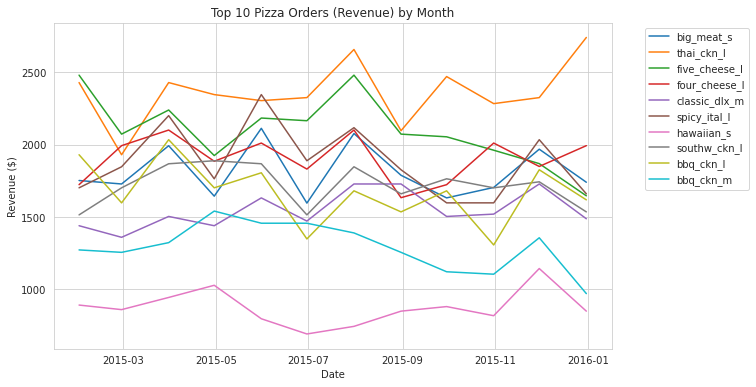

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

for pizza_id in top_pizza_ids:
    data = revenue_by_top_pizza_ids[revenue_by_top_pizza_ids['pizza_id'] == pizza_id]
    sns.lineplot(x='datetime', y='revenue', data=data, label=pizza_id)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top 10 Pizza Orders (Revenue) by Month')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.savefig('CHART6.png', dpi=300, bbox_inches='tight')